In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [43]:
data = pd.read_csv("C:/Users/charl/Downloads/iris/iris.csv")

In [44]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [45]:
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'label']
df = pd.DataFrame(data)
df.columns = columns
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  4.9               3.0                1.4               0.2   
1                  4.7               3.2                1.3               0.2   
2                  4.6               3.1                1.5               0.2   
3                  5.0               3.6                1.4               0.2   
4                  5.4               3.9                1.7               0.4   
..                 ...               ...                ...               ...   
144                6.7               3.0                5.2               2.3   
145                6.3               2.5                5.0               1.9   
146                6.5               3.0                5.2               2.0   
147                6.2               3.4                5.4               2.3   
148                5.9               3.0                5.1               1.8   

              label  
0    

In [46]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label']=le.fit_transform(data['label'])

In [48]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [49]:
data.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
label                 3
dtype: int64

In [50]:
# 결측치 확인
missing_values = data.isnull().sum()

# 결측치 출력
print("결측치 확인:\n", missing_values)

결측치 확인:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64


<Figure size 1000x700 with 0 Axes>

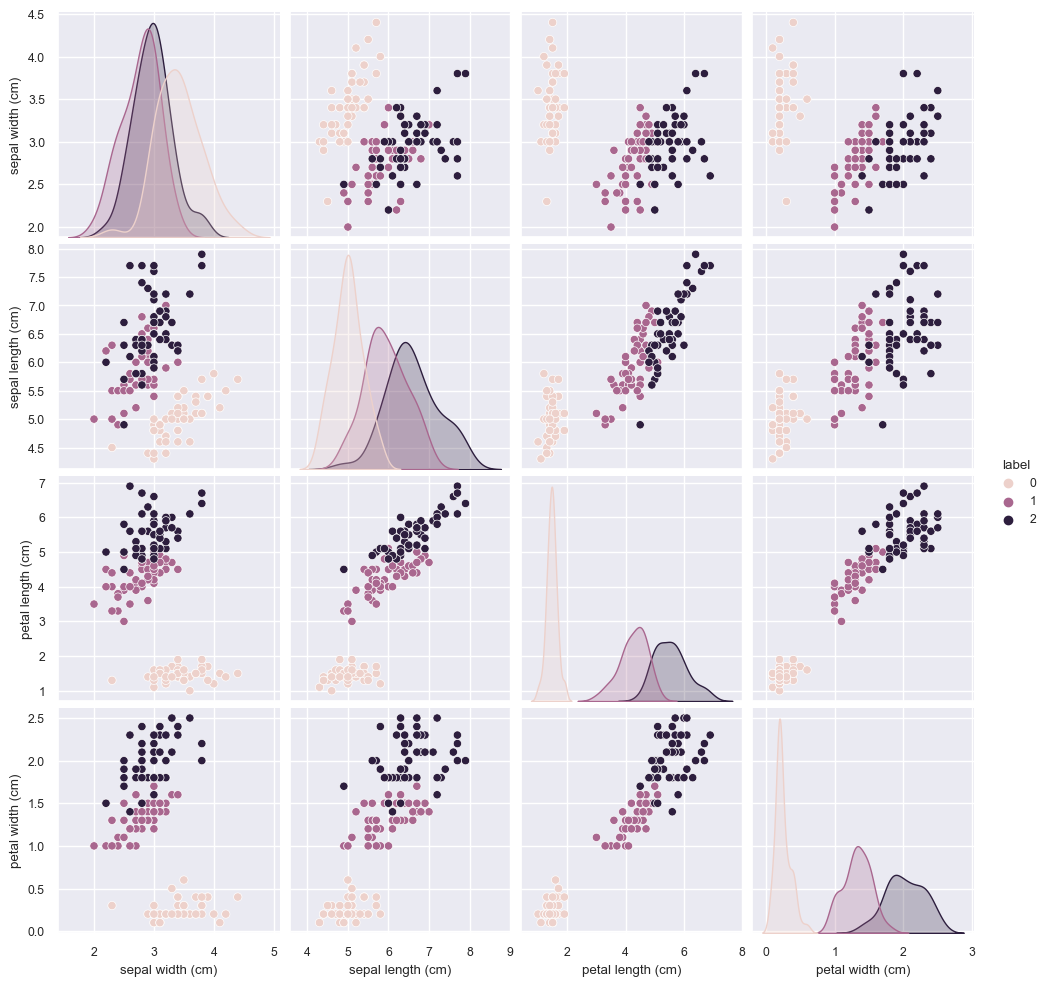

In [51]:
import seaborn as sns

sns.pairplot(data,
             vars=['sepal width (cm)','sepal length (cm)','petal length (cm)','petal width (cm)'],
            hue ='label')
plt.show()

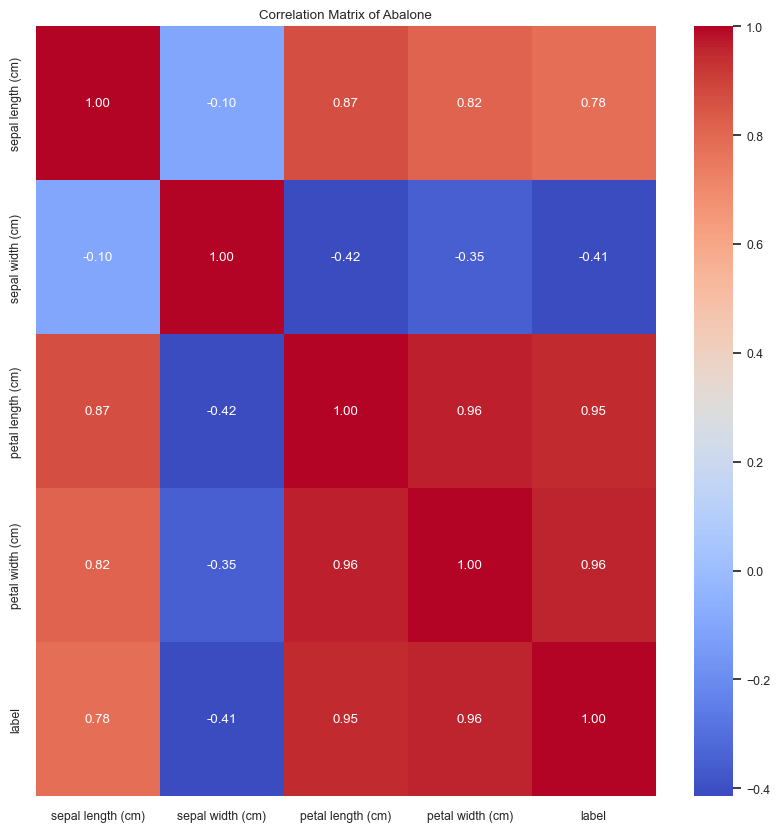

In [52]:
#상관 관계 행렬
data_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt='.2f')
#sns.heatmap(data_corr, annot=True, cbar=False)
plt.title('Correlation Matrix of Abalone')
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
X = df.drop('label',axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [55]:
y = df['label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

In [56]:
Y = pd.get_dummies(y).values

In [57]:
X = X.values

In [58]:
X

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [60]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((119, 4), (119, 3), (30, 4), (30, 3))

In [61]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(4,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(3))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 40        
                                                                 
 dense_9 (Dense)             (None, 30)                270       
                                                                 
 dense_10 (Dense)            (None, 30)                930       
                                                                 
 dense_11 (Dense)            (None, 3)                 93        
                                                                 
Total params: 1,333
Trainable params: 1,333
Non-trainable params: 0
_________________________________________________________________


In [67]:
history = model.fit(X_train, y_train, epochs=N_EPOCHS, batch_size=64, validation_data=(X_train, y_train))


Epoch 1/100
2/2 [==============================] - 0s 46ms/step - loss: 0.0773 - mse: 0.0773 - val_loss: 0.0775 - val_mse: 0.0775
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0876 - mse: 0.0876 - val_loss: 0.0807 - val_mse: 0.0807
Epoch 3/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0745 - mse: 0.0745 - val_loss: 0.0751 - val_mse: 0.0751
Epoch 4/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0734 - mse: 0.0734 - val_loss: 0.0717 - val_mse: 0.0717
Epoch 5/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0720 - mse: 0.0720 - val_loss: 0.0716 - val_mse: 0.0716
Epoch 6/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0710 - mse: 0.0710 - val_loss: 0.0698 - val_mse: 0.0698
Epoch 7/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0700 - mse: 0.0700 - val_loss: 0.0709 - val_mse: 0.0709
Epoch 8/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0703 - mse: 0.07

In [68]:
model.fit(X_train, y_train, epochs=100, batch_size=120, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 15ms/step - loss: 0.0524 - mse: 0.0524


<Figure size 1000x700 with 0 Axes>

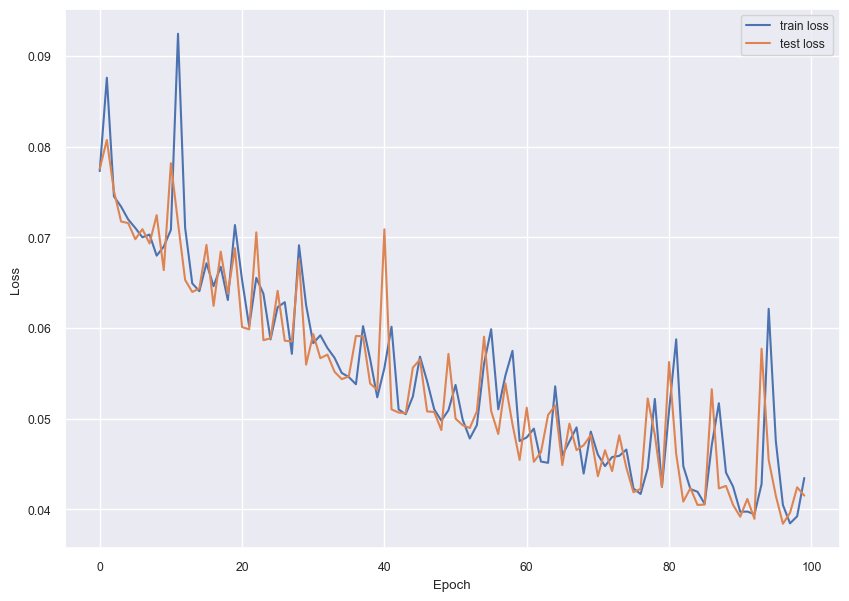

In [69]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()